In [1]:
import pandas as pd
import altair as alt

alt.themes.enable('opaque')

ThemeRegistry.enable('opaque')

In [2]:
position = 'K'
week = '1'
PATH = 'data/week' + week + '/' + position + '/'

In [3]:
df = pd.read_csv(PATH + position + '.csv')
df.head()

,Player,Team,Games,FGM,FGA,FGPercentage,EPM,EPA,FantasyPoints,FantasyPointsPerGame
0,Harrison Butker,KC,1,4,4,100.0%,4,4,16.0,16.0
1,Stephen Gostkowski,NE,1,4,4,100.0%,3,3,15.0,15.0
2,Zane Gonzalez,ARI,1,4,4,100.0%,1,1,13.0,13.0
3,Wil Lutz,NO,1,3,4,75.0%,3,3,12.0,12.0
4,Greg Zuerlein,LAR,1,3,4,75.0%,3,3,12.0,12.0


In [4]:
df.columns

Index(['Player', 'Team', 'Games', 'FGM', 'FGA', 'FGPercentage', 'EPM', 'EPA',
       'FantasyPoints', 'FantasyPointsPerGame'],
      dtype='object')

In [5]:
data = df[['Player', 'Team', 'FGM', 'FGA', 'FGPercentage', 'EPM', 'EPA',
       'FantasyPoints']].copy()

In [6]:
# Create sorted list of teams in dataframe
# Data is defined below, above charts
teams = sorted((data['Team'].unique()))
teams[:5]

['ARI', 'ATL', 'BAL', 'BUF', 'CAR']

In [7]:
# Create list of all 32 teams
all_teams = ['ARI', 'ATL', 'BAL', 'BUF',
             'CAR', 'CHI', 'CIN', 'CLE',
             'DAL', 'DEN', 'DET', 'GB',
             'HOU', 'IND', 'JAC', 'KC', 
             'LAC', 'LAR', 'MIA', 'MIN', 
             'NE', 'NO', 'NYG', 'NYJ', 
             'OAK', 'PHI', 'PIT', 'SEA',
             'SF', 'TB', 'TEN', 'WAS']

In [8]:
# Sometimes a team can be missing, find which ones
[team for team in all_teams if team not in teams]

[]

In [9]:
# Create list of team colors, comment colors for missing teams
color_codes = [
    '#97233F', #ARI
    '#A71930', #ATL
    '#241773', #BAL
    '#00338D', #BUF
    '#0085CA', #CAR
    '#C83803', #CHI
    '#FB4F14', #CIN
    '#311D00', #CLE
    '#869397', #DAL
    '#FB4F14', #DEN
    '#0076B6', #DET
    '#203731', #GB
    '#03202F', #HOU
    '#002C5F', #IND
    '#006778', #JAC
    '#E31837', #KC
    '#FFC20E', #LAC
    '#866D4B', #LAR
    '#FC4C02', #MIA
    '#4F2683', #MIN
    '#002244', #NE
    '#D3BC8D', #NO
    '#0B2265', #NYG
    '#125740', #NYJ
    '#000000', #OAK
    '#004C54', #PHI
    '#FFB612', #PIT
    '#69BE28', #SEA
    '#AA0000', #SF
    '#D50A0A', #TB
    '#418FDE', #TEN
    '#773141' #WAS
]

## Fantasy Points

In [10]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'FantasyPoints:Q',
        axis = alt.Axis(title = 'Fantasy Points')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'FantasyPoints',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: Fantasy Points by Kickers')

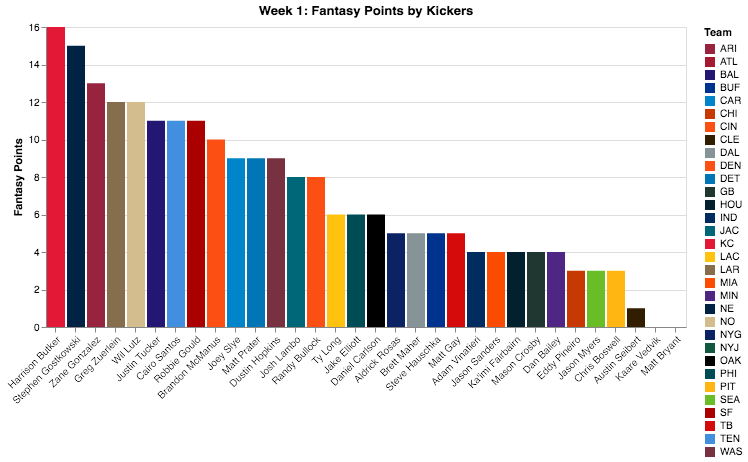

In [11]:
chart

In [12]:
chart.save(PATH + 'plots/K_fantasypoints_color.png', scale_factor=3.0)

In [13]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'FantasyPoints:Q',
        axis = alt.Axis(title = 'Fantasy Points')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'FantasyPoints',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: Fantasy Points by Kickers')

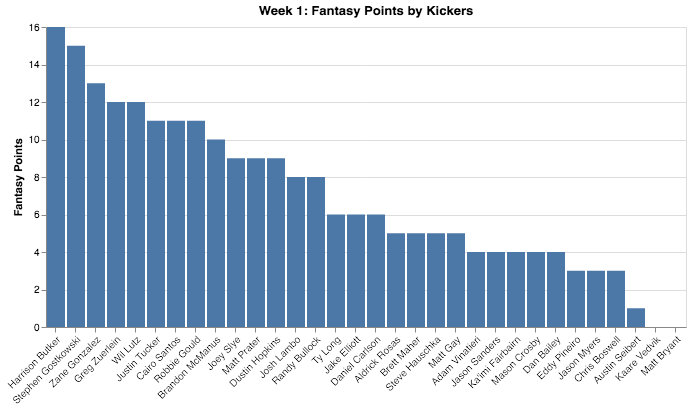

In [14]:
chart

In [15]:
chart.save(PATH + 'plots/K_fantasypoints_plain.png', scale_factor=3.0)

## Field Goals Attempted

In [19]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'FGA:Q',
        axis = alt.Axis(title = 'Field Goals Attempted',
                       tickMinStep = 1)
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'FGA',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: Field Goals Attempted by Kickers')

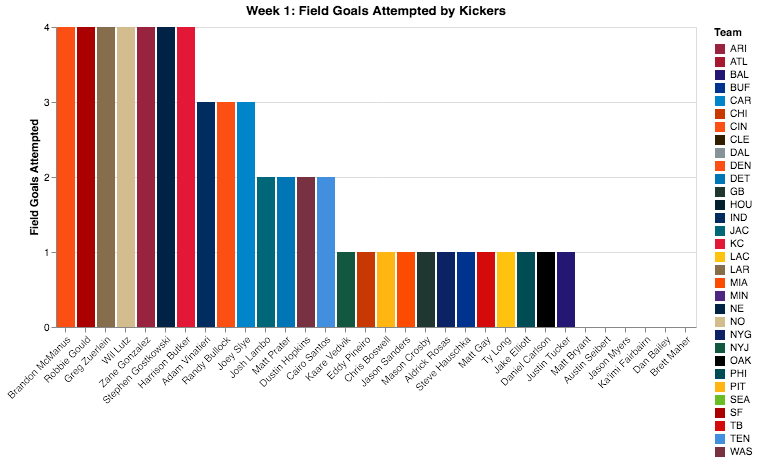

In [20]:
chart

In [21]:
chart.save(PATH + 'plots/K_fga_color.png', scale_factor=3.0)

In [24]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'FGA:Q',
        axis = alt.Axis(title = 'Field Goals Attempted',
                       tickMinStep = 1)
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'FGA',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: Field Goals Attempted by Kickers')

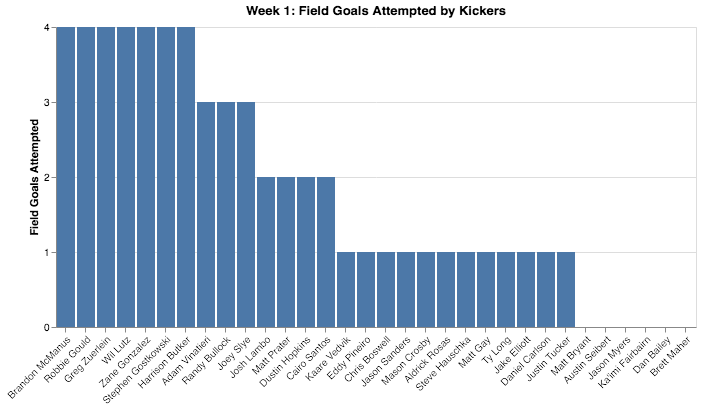

In [25]:
chart

In [26]:
chart.save(PATH + 'plots/K_fga_plain.png', scale_factor=3.0)

## Field Goals Made

In [29]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'FGM:Q',
        axis = alt.Axis(title = 'Field Goals Made',
                       tickMinStep = 1)
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'FGM',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: Field Goals Made by Kickers')

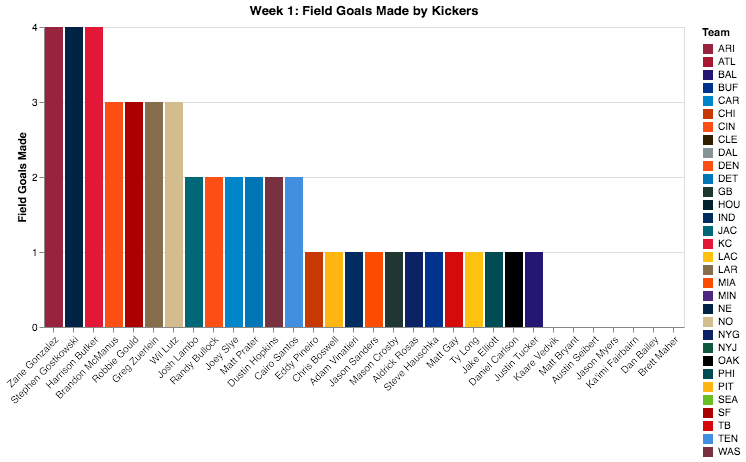

In [30]:
chart

In [31]:
chart.save(PATH + 'plots/K_fgm_color.png', scale_factor=3.0)

In [32]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'FGM:Q',
        axis = alt.Axis(title = 'Field Goals Made',
                       tickMinStep = 1)
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'FGM',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: Field Goals Made by Kickers')

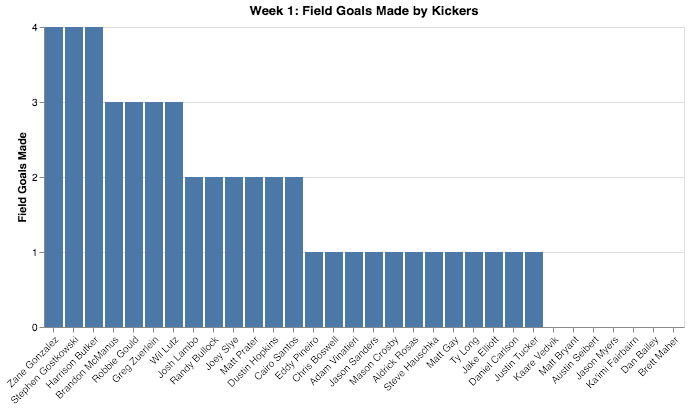

In [33]:
chart

In [34]:
chart.save(PATH + 'plots/K_fgm_plain.png', scale_factor=3.0)

## Field Goals % Accuracy

In [40]:
data = data.loc[data['FGA'] > 0]
data['FGPercentage'] = data['FGM'] / data['FGA']

In [47]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'FGPercentage:Q',
        axis = alt.Axis(title = 'Field Goals Accuracy',
                       format='.0%')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'FGPercentage',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: Field Goals Accuracy by Kickers (Min. Attempts: 1)')

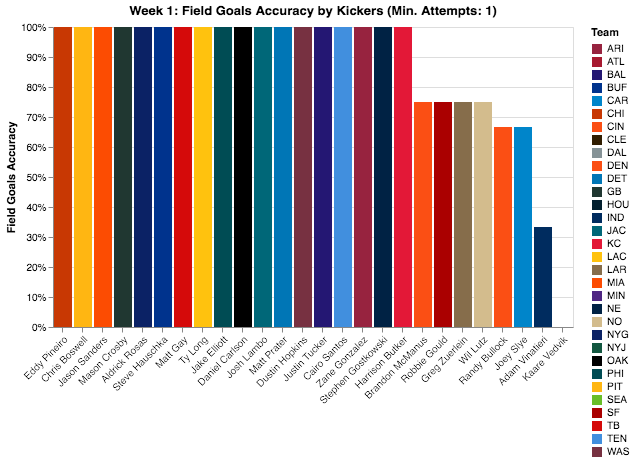

In [48]:
chart

In [49]:
chart.save(PATH + 'plots/K_fgpercentage_color.png', scale_factor=3.0)

In [50]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'FGPercentage:Q',
        axis = alt.Axis(title = 'Field Goals Accuracy',
                       format='.0%')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'FGPercentage',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: Field Goals Accuracy by Kickers (Min. Attempts: 1)')

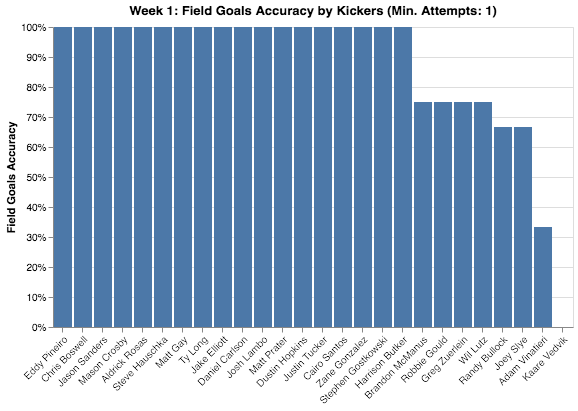

In [51]:
chart

In [52]:
chart.save(PATH + 'plots/K_fgpercentage_plain.png', scale_factor=3.0)

## Extra Points Attempted

In [55]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'EPA:Q',
        axis = alt.Axis(title = 'Extra Points Attempted',
                       tickMinStep = 1)
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'EPA',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: Extra Points Attempted by Kickers')

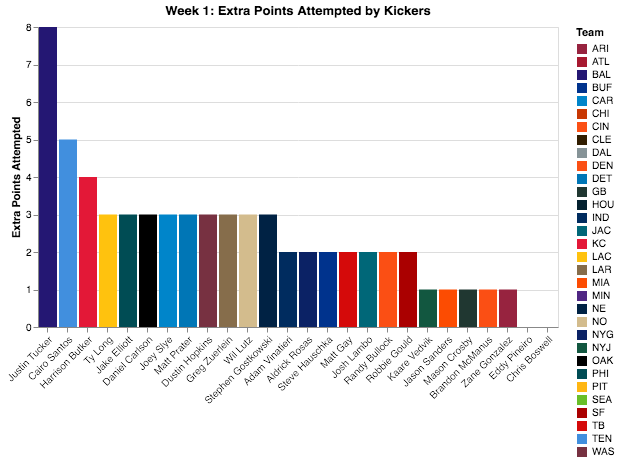

In [56]:
chart

In [57]:
chart.save(PATH + 'plots/K_epa_color.png', scale_factor=3.0)

In [58]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'EPA:Q',
        axis = alt.Axis(title = 'Extra Points Attempted',
                       tickMinStep = 1)
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'EPA',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: Extra Points Attempted by Kickers')

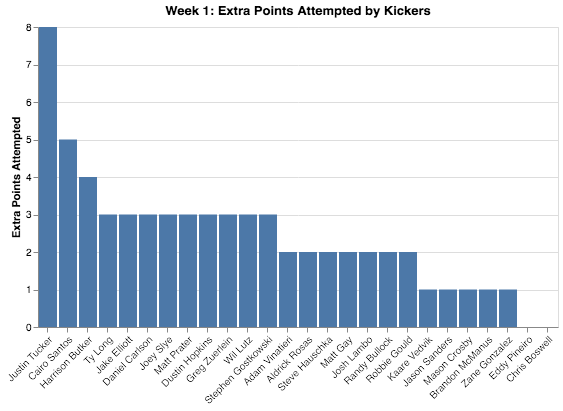

In [59]:
chart

In [60]:
chart.save(PATH + 'plots/K_epa_plain.png', scale_factor=3.0)

## Extra Points Made

In [61]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'EPM:Q',
        axis = alt.Axis(title = 'Extra Points Made',
                       tickMinStep = 1)
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'EPM',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: Extra Points Made by Kickers')

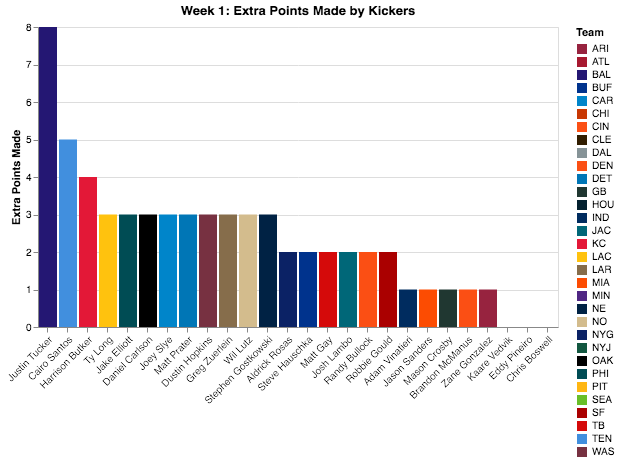

In [62]:
chart

In [63]:
chart.save(PATH + 'plots/K_epm_color.png', scale_factor=3.0)

In [64]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'EPM:Q',
        axis = alt.Axis(title = 'Extra Points Made',
                       tickMinStep = 1)
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'EPM',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: Extra Points Made by Kickers')

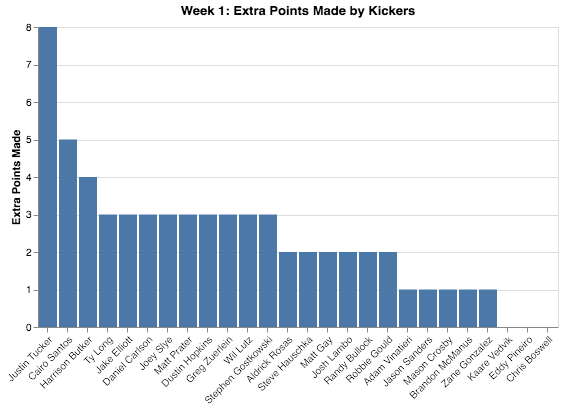

In [65]:
chart

In [66]:
chart.save(PATH + 'plots/K_epm_plain.png', scale_factor=3.0)

## Extra Points % Accuracy

In [67]:
data = data.loc[data['EPA'] > 0]
data['EPPercentage'] = data['EPM'] / data['EPA']

/Users/sarthak/Documents/FantasyFootballVisualizer2019/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'EPPercentage:Q',
        axis = alt.Axis(title = 'Extra Points Accuracy',
                       format='.0%')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'EPPercentage',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: Extra Points Accuracy by Kickers (Min. Attempts: 1)')

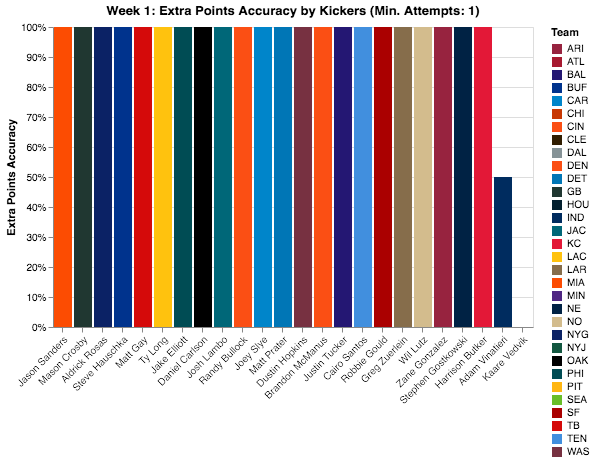

In [69]:
chart

In [70]:
chart.save(PATH + 'plots/K_eppercentage_color.png', scale_factor=3.0)

In [71]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'EPPercentage:Q',
        axis = alt.Axis(title = 'Extra Points Accuracy',
                       format='.0%')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'EPPercentage',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: Extra Points Accuracy by Kickers (Min. Attempts: 1)')

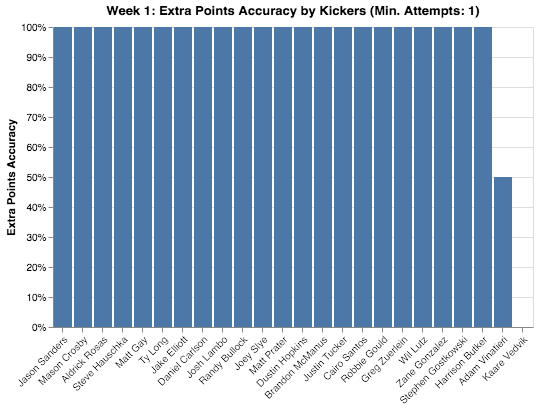

In [72]:
chart

In [73]:
chart.save(PATH + 'plots/K_eppercentage_plain.png', scale_factor=3.0)